In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 1. Sıcaklık Tahmini
Bu alıştırmada, Szeged, Macaristan bölgesindeki tarihi sıcaklık verileriyle çalışacaksınız.

Öncelikle, Sıcaklık verilerini Kaggle'dan indirin.
Hedef değişkenin sıcaklık olduğu bir regresyon modeli oluşturun. Açıklayıcı değişkenler olarak nem, rüzgar hızı, rüzgar ve basınç kullanın. OLS kullanarak modeli tahmin edin.
Şimdi, modelinizin yukarıdaki Gauss-Markov Koşullarını karşılayıp karşılamadığını kontrol edin. Eğer bazı varsayımlar karşılanmazsa, modelinizin doğruluğu için ihlallerin etkilerini tartışın.

## 2. Ev fiyatları
Bu ödevi tamamlamak için, aşağıdaki görevlerin çözümlerini içeren bir Jupyter notebooku gönderin:

Ev Fiyatları verilerini Kaggle'dan indirin.
Önceki derste oluşturduğunuz modeli yeniden gerçekleştirin.
Yukarıdaki tüm varsayımları kontrol edin ve bazı varsayımların karşılanmadığı durumlarda sonuçları tartışın.

In [2]:
ev_fiyatlari = pd.read_csv("data/train.csv")
ev_fiyatlari.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
corr_matrix = ev_fiyatlari.corr()
corr_matrix.SalePrice.sort_values(ascending=False)[1:11]

OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

In [4]:
Y = ev_fiyatlari['SalePrice']

X = ev_fiyatlari[['YearBuilt', 'TotRmsAbvGrd', 'FullBath' , '1stFlrSF', 'TotalBsmtSF',
            'GarageArea', 'GarageCars', 'GrLivArea', 'OverallQual', 'YearRemodAdd']]

In [5]:
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [6]:
print('Değişkenler: \n', lrm.coef_)
print('Sabit değer (bias): \n', lrm.intercept_)

Değişkenler: 
 [ 2.68240707e+02  3.31050771e+01 -6.79087146e+03  1.41737355e+01
  1.98650991e+01  1.49475334e+01  1.04179010e+04  5.12971178e+01
  1.96045898e+04  2.96481161e+02]
Sabit değer (bias): 
 -1186193.7666661674


**Katsayilarda modelin dogrusalligi**

In [7]:
dogrusal_mi =pd.DataFrame()

dogrusal_mi['X'] = np.arange(0,1000,1)
dogrusal_mi['X_sq'] = dogrusal_mi['X']**2
dogrusal_mi['Y'] = 1+ 2* dogrusal_mi['X'] + 3*dogrusal_mi['X_sq'] 
dogrusal_mi.head()

,X,X_sq,Y
0,0,0,1
1,1,1,6
2,2,4,17
3,3,9,34
4,4,16,57


In [8]:
lrm_dogrusal_mi = linear_model.LinearRegression()
lrm_dogrusal_mi.fit(dogrusal_mi[["X","X_sq"]],dogrusal_mi["Y"])

tahmin = lrm_dogrusal_mi.predict(dogrusal_mi[["X","X_sq"]])

print('Değişkenler: \n', lrm_dogrusal_mi.coef_)
print('Sabit değer (bias): \n', lrm_dogrusal_mi.intercept_)

Değişkenler: 
 [2. 3.]
Sabit değer (bias): 
 0.999999999650754


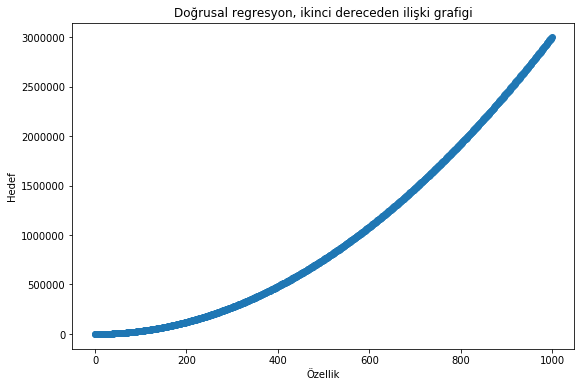

In [9]:
plt.figure(figsize=(9,6))
plt.scatter(dogrusal_mi["X"], tahmin)
plt.xlabel("Özellik")
plt.ylabel("Hedef")
plt.title('Doğrusal regresyon, ikinci dereceden ilişki grafigi')
plt.show()

Katsayilar dogru bir sekilde tahmin edilmis ve hedef degisken le ikinci dereceden degiskenler arasindaki iliski yakalanmistir. 

**Hata Terimi Ortalamada sifir**

In [10]:
tahmin = lrm.predict(X)

In [11]:
tahmin = lrm.predict(X)
hatalar = Y-tahmin

print(" modelinin ortalama hatası : {:.15f}".format(np.mean(hatalar)))


 modelinin ortalama hatası : 0.000000000047363


In [12]:
X.shape

(1460, 10)

In [13]:
Y.shape

(1460,)

Modelin hatalarının ortalaması sıfırdır

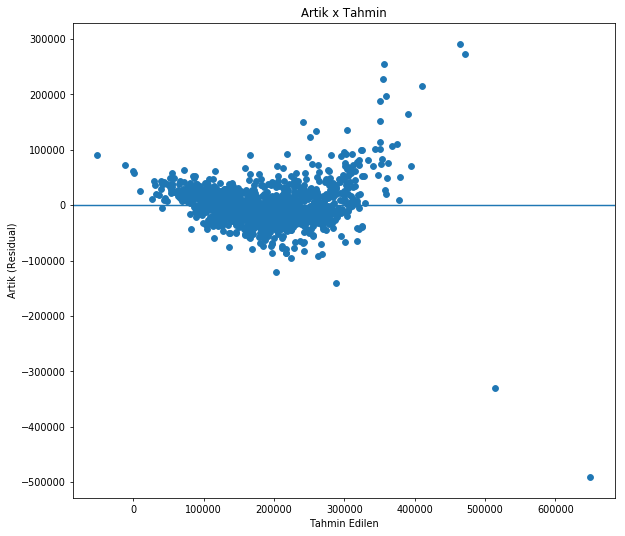

In [14]:
#Homoscedasticity

plt.figure(figsize=(10,9), dpi=70)
plt.scatter(tahmin, hatalar)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Artik (Residual)')
plt.axhline()
plt.title('Artik x Tahmin')
plt.show()

In [15]:
from scipy.stats import bartlett
from scipy.stats import levene

In [16]:
bart_stats = bartlett(tahmin, hatalar)
lev_stats = levene(tahmin, hatalar)

In [17]:
print("Bartlett test değeri : {0:3g} ve p değeri : {1:.50f}".format(bart_stats[0], bart_stats[1]))
print("Levene test değeri   : {0:3g} ve p değeri : {1:.50f}".format(lev_stats[0], lev_stats[1]))

Bartlett test değeri : 519.442 ve p değeri : 0.00000000000000000000000000000000000000000000000000
Levene test değeri   : 525.361 ve p değeri : 0.00000000000000000000000000000000000000000000000000


Her iki testin p değerleri 0.05'ten düşüktür. Dolayısıyla, test sonuçları null hipotezini reddeder, bu da hatalarımızın heteroscedastic olduğu anlamına gelir.

In [18]:
#Dusuk Coklu Dogrusallik/low multicollineartiy
?


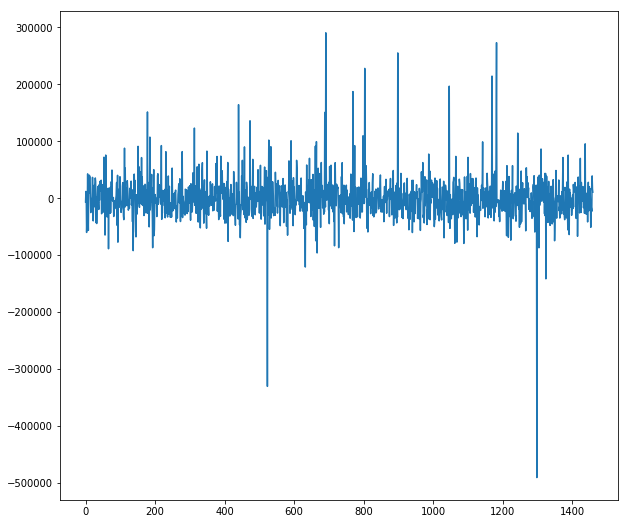

In [19]:
#Hata Terimleri birbirleriyle iliskisiz olmalidir. 


plt.figure(figsize=(10,9))
plt.plot(hatalar) 

In [20]:
#Hatalar arasındaki korelasyonlara bakmanın bir başka yolu da otokorelasyon fonksiyonunu kullanmaktır. 

from statsmodels.tsa.stattools import acf 

In [21]:
acf_data = acf(hatalar)

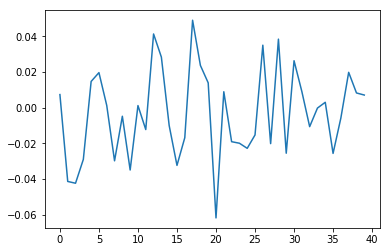

In [22]:
plt.plot(acf_data[1:])

Hata terimleri arasindaki otokorelasyon oldukca dusuktur.

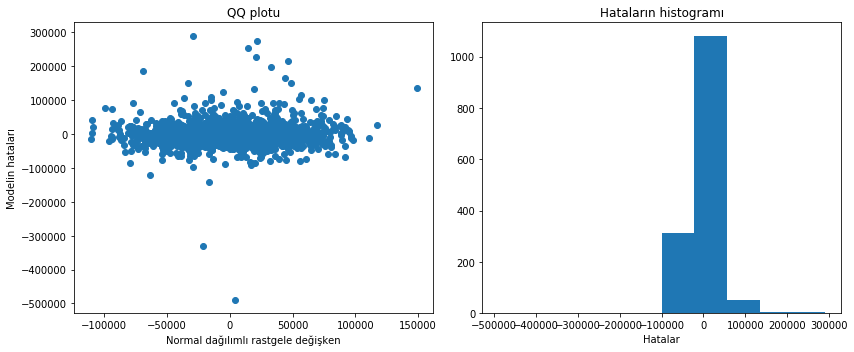

In [23]:
#Ozellikler hatalarla iliskilendirilmemelidir.


rand_nums = np.random.normal(np.mean(hatalar), np.std(hatalar), len(hatalar))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(rand_nums, hatalar)
plt.xlabel("Normal dağılımlı rastgele değişken")
plt.ylabel("Modelin hataları")
plt.title("QQ plotu")

plt.subplot(1,2,2)
plt.hist(hatalar)
plt.xlabel("Hatalar")
plt.title("Hataların histogramı")

plt.tight_layout()
plt.show()

In [24]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

In [25]:
jb_stats = jarque_bera(hatalar)
norm_stats = normaltest(hatalar)

print("Jarque-Bera test değeri : {0} ve p değeri : {1}".format(jb_stats[0], jb_stats[1]))
print("Normal test değeri      : {0}  ve p değeri : {1:.30f}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test değeri : 58906.27914183963 ve p değeri : 0.0
Normal test değeri      : 477.8136160935637  ve p değeri : 0.000000000000000000000000000000


Her iki test de hatalarimizin normal dagilmadigini gosterir. 